In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA

In [30]:
img = mpimg.imread('image.jpg')

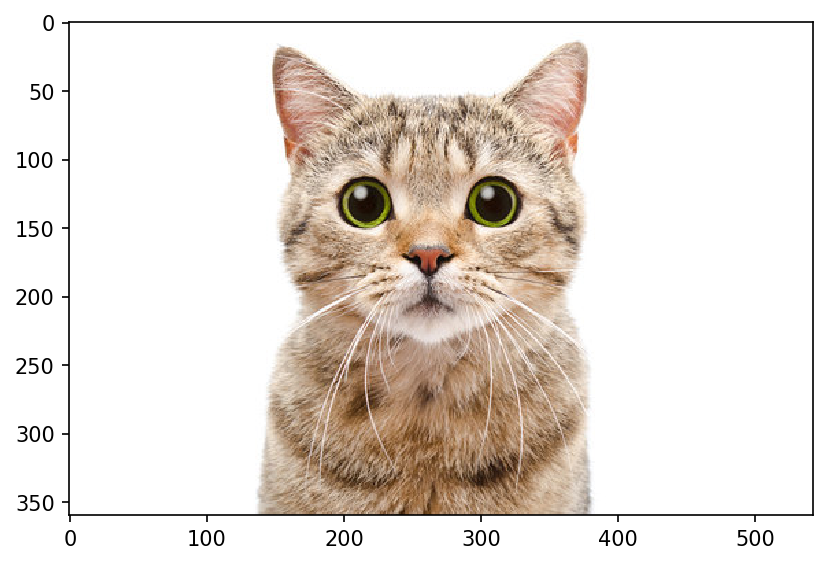

In [35]:
plt.figure(dpi = 150)
plt.imshow(img, interpolation='none')
plt.show()

In [32]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

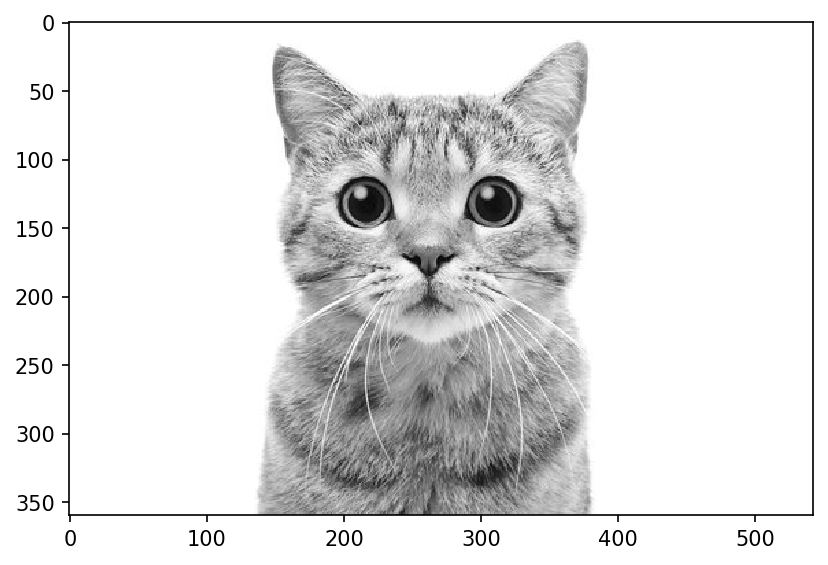

In [36]:
gray_img = rgb2gray(img)

plt.figure(dpi = 150)
plt.imshow(gray_img,cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [42]:
U, d, V_T = LA.svd(gray_img)

In [45]:
gray_img.shape

(360, 543)

In [47]:
print(U.shape)
print(len(d))
print(V_T.shape)

(360, 360)
360
(543, 543)


Restoring to original image from U, d, V_T

In [49]:
np.diag(d).shape

(360, 360)

In [57]:
D = np.concatenate((np.diag(d), np.zeros((gray_img.shape[1] - len(d), gray_img.shape[0])) ))

In [58]:
np.dot(U, np.dot(D, V_T))

ValueError: shapes (543,360) and (543,543) not aligned: 360 (dim 1) != 543 (dim 0)

In [59]:
np.dot([[1,2],[2,3]], [[2,3],[3,4]])

array([[ 8, 11],
       [13, 18]])